100%|██████████| 900/900 [00:30<00:00, 29.70it/s]


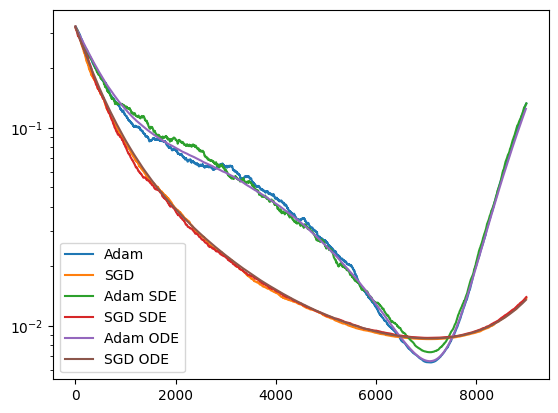

In [1]:
from optimizers import Adam, SGD
from sdes import AdamSDE, SgdSDE
from odes import AdamODE, SgdODE

import jax.numpy as jnp
from jax.numpy.linalg import norm

import matplotlib.pyplot as plt

# Setup the problem and parameters

problem_type = 'linreg' # or 'logreg'

d = 1000 # dimension
beta1 = 0 
beta2 = 0.7
T = 9 # time to run SDE for

# lr = 0.7 # SDE learning rate
# lrk = lr / d # Optimzer learning rate


lr = lambda x: jnp.cos(2 * x / T) # SDE learning rate
lrk = lambda x: jnp.cos(2 * x / T / d) /d # SDE learning rate


cov = jnp.linspace(0.01, 1.5, d) # initialize with diagonal covariance

params0 = jnp.linspace(2,0.1,d)
optimal_params = jnp.linspace(0.1,2,d)
params0 /= norm(params0)
optimal_params /= norm(optimal_params)


# Run the optimizers
adam = Adam(problem_type)
sgd = SGD(problem_type)

_, adam_risks = adam.run(params0, cov, T, lrk, optimal_params, beta1 = beta1, beta2 = beta2)
_, sgd_risks = sgd.run(params0, cov, T, lrk, optimal_params)

# Run the SDE equivalents
sgd_sde = SgdSDE(problem_type)
params, sgd_sde_risks, times_s = sgd_sde.run(params0, optimal_params, cov, T, lr)

adam_sde = AdamSDE(problem_type)
params, adam_sde_risks, times_s = adam_sde.run(params0, optimal_params, cov, T, lr, beta1 = beta1, beta2 = beta2)

# Run the ODE equivalents
adam_ode = AdamODE(problem_type)
sgd_ode = SgdODE(problem_type)

sgd_risk, time, B = sgd_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01)
adam_risk, time, B = adam_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01, beta1 = beta1, beta2 = beta2)

plt.yscale('log')
plt.plot(adam_risks, label = 'Adam')
plt.plot(sgd_risks, label = 'SGD')

plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')

plt.plot(time * d, adam_risk, label = 'Adam ODE')
plt.plot(time * d, sgd_risk, label = 'SGD ODE')

plt.legend()
plt.show()

In [2]:
# from optimizers import Adam, SGD
# from sde import AdamSDE, SgdSDE
# from odes import AdamODE, SgdODE

# import jax.numpy as jnp
# from jax.numpy.linalg import norm

# import matplotlib.pyplot as plt

# # Setup the problem and parameters

# problem_type = 'linreg' # or 'logreg'

# d = 1000 # dimension
# lr = 0.7 # SDE learning rate
# lrk = lr / d # Adam learning rate
# beta1 = 0 
# beta2 = 0.7
# T = 9 # time to run SDE for

# cov = jnp.linspace(0.01, 1.5, d) # initialize with diagonal covariance

# params0 = jnp.linspace(2,0.1,d)
# optimal_params = jnp.linspace(0.1,2,d)
# params0 /= norm(params0)
# optimal_params /= norm(optimal_params)


# # Run the optimizers
# adam = Adam(problem_type)
# sgd = SGD(problem_type)

# _, adam_risks = adam.run(params0, cov, T, lrk, optimal_params, beta1 = beta1, beta2 = beta2)
# _, sgd_risks = sgd.run(params0, cov, T, lrk, optimal_params)

# # Run the SDE equivalents
# sgd_sde = SgdSDE(problem_type)
# params, sgd_sde_risks, times_s = sgd_sde.run(params0, optimal_params, cov, T, lr)

# adam_sde = AdamSDE(problem_type)
# params, adam_sde_risks, times_s = adam_sde.run(params0, optimal_params, cov, T, lr, beta1 = beta1, beta2 = beta2)

# # Run the ODE equivalents
# adam_ode = AdamODE(problem_type)
# sgd_ode = SgdODE(problem_type)

# sgd_risk, time, B = sgd_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01)
# adam_risk, time, B = adam_ode.run(params0, optimal_params, cov, T, lr, dt = 0.01, beta1 = beta1, beta2 = beta2)

# plt.yscale('log')
# plt.plot(adam_risks, label = 'Adam')
# plt.plot(sgd_risks, label = 'SGD')

# plt.plot(times_s * d, adam_sde_risks, label = 'Adam SDE')
# plt.plot(times_s * d, sgd_sde_risks, label = 'SGD SDE')

# plt.plot(time * d, adam_risk, label = 'Adam ODE')
# plt.plot(time * d, sgd_risk, label = 'SGD ODE')

# plt.legend()
# plt.show()